In [1]:
import numpy as np
x_train = np.load("/home/jovyan/UNSW/x_train.npy")
y_train = np.load("/home/jovyan/UNSW/y_train.npy")
x_val = np.load("/home/jovyan/UNSW/x_val.npy")
y_val = np.load("/home/jovyan/UNSW/y_val.npy")
x_test = np.load("/home/jovyan/UNSW/x_test.npy")
y_test = np.load("/home/jovyan/UNSW/y_test.npy")

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/UNSW/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/UNSW/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)

dump(xgb, "/home/jovyan/UNSW/pre_train/XGB.joblib")

model = xgb

epsilon = 0.01
FPR: [0.10699875 0.12406593]
TPR: [0.87593407 0.89300125]
FNR: [0.12406593 0.10699875]
TNR: [0.89300125 0.87593407]
Accuracy: 0.887550341753604
Precision(micro,macro,weighted): 0.887550341753604,0.866123468215183,0.8923760590686882
F1(micro,macro,weighted: 0.887550341753604,0.873990458528782,0.8889227599236292
Recall(micro,macro,weighted: 0.887550341753604,0.8844676582006898,0.887550341753604
FPR: 0.11553234179931013
tpr: 0.8844676582006898
fnr: 0.11553234179931013
tnr: 0.8844676582006898


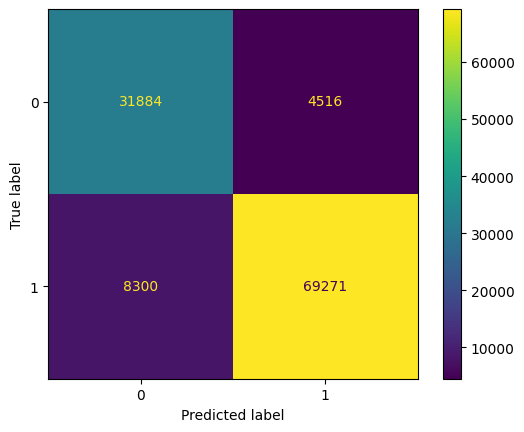

epsilon = 0.1
FPR: [0.35477176 0.16508242]
TPR: [0.83491758 0.64522824]
FNR: [0.16508242 0.35477176]
TNR: [0.64522824 0.83491758]
Accuracy: 0.7058111273920559
Precision(micro,macro,weighted): 0.7058111273920559,0.7087996552252518,0.7752721994826842
F1(micro,macro,weighted: 0.7058111273920559,0.6967886936632564,0.7156830283045791
Recall(micro,macro,weighted: 0.7058111273920559,0.7400729124654464,0.7058111273920559
FPR: 0.2599270875345536
tpr: 0.7400729124654464
fnr: 0.2599270875345536
tnr: 0.7400729124654464


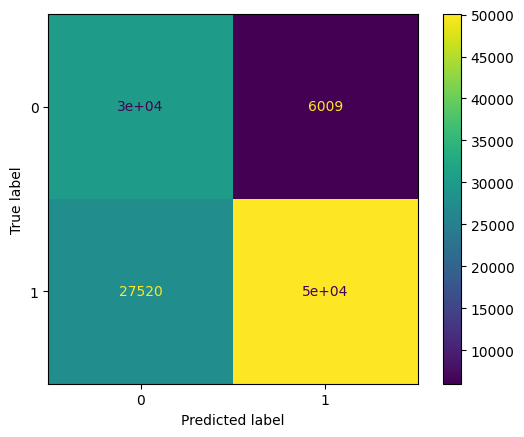

epsilon = 0.2
FPR: [0.29603847 0.17989011]
TPR: [0.82010989 0.70396153]
FNR: [0.17989011 0.29603847]
TNR: [0.70396153 0.82010989]
Accuracy: 0.7410569355362329
Precision(micro,macro,weighted): 0.7410569355362329,0.7290676596342383,0.788260665769389
F1(micro,macro,weighted: 0.7410569355362329,0.7282357102067842,0.7495591870009161
Recall(micro,macro,weighted: 0.7410569355362329,0.7620357110628604,0.7410569355362329
FPR: 0.2379642889371396
tpr: 0.7620357110628604
fnr: 0.2379642889371396
tnr: 0.7620357110628604


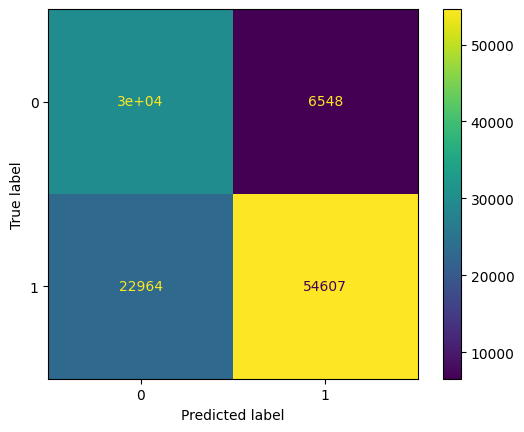

epsilon = 0.3
FPR: [0.29218393 0.88662088]
TPR: [0.11337912 0.70781607]
FNR: [0.88662088 0.29218393]
TNR: [0.70781607 0.11337912]
Accuracy: 0.5179650963841679
Precision(micro,macro,weighted): 0.5179650963841679,0.39192307806060456,0.47785673822586244
F1(micro,macro,weighted: 0.5179650963841679,0.3985774886316068,0.4953755192895696
Recall(micro,macro,weighted: 0.5179650963841679,0.4105975930806247,0.5179650963841679
FPR: 0.5894024069193753
tpr: 0.4105975930806247
fnr: 0.5894024069193753
tnr: 0.4105975930806247


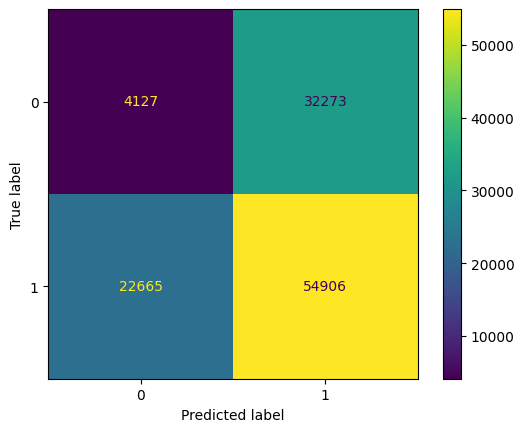

epsilon = 0.01
FPR: [0.10109448 0.1281044 ]
TPR: [0.8718956  0.89890552]
FNR: [0.1281044  0.10109448]
TNR: [0.89890552 0.8718956 ]
Accuracy: 0.8902791060883909
Precision(micro,macro,weighted): 0.8902791060883909,0.8695915770270461,0.8940573300211756
F1(micro,macro,weighted: 0.8902791060883909,0.8765626404955301,0.8914268383509647
Recall(micro,macro,weighted: 0.8902791060883909,0.8854005616053128,0.8902791060883909
FPR: 0.11459943839468725
tpr: 0.8854005616053128
fnr: 0.11459943839468725
tnr: 0.8854005616053128


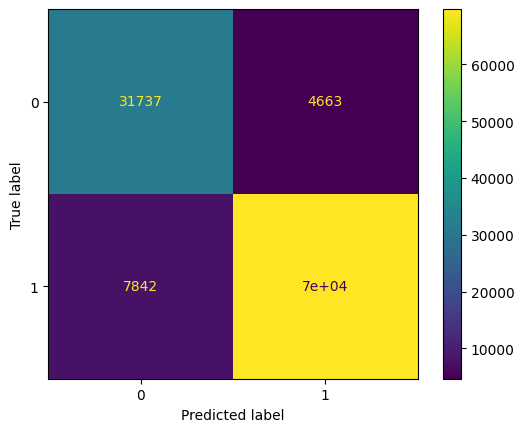

epsilon = 0.1
FPR: [0.3320313  0.17486264]
TPR: [0.82513736 0.6679687 ]
FNR: [0.17486264 0.3320313 ]
TNR: [0.6679687  0.82513736]
Accuracy: 0.7181651472743066
Precision(micro,macro,weighted): 0.7181651472743066,0.7144733114186861,0.7780968250276237
F1(micro,macro,weighted: 0.7181651472743066,0.7074825000679358,0.7276760385497307
Recall(micro,macro,weighted: 0.7181651472743066,0.7465530311401352,0.7181651472743066
FPR: 0.2534469688598648
tpr: 0.7465530311401352
fnr: 0.2534469688598648
tnr: 0.7465530311401352


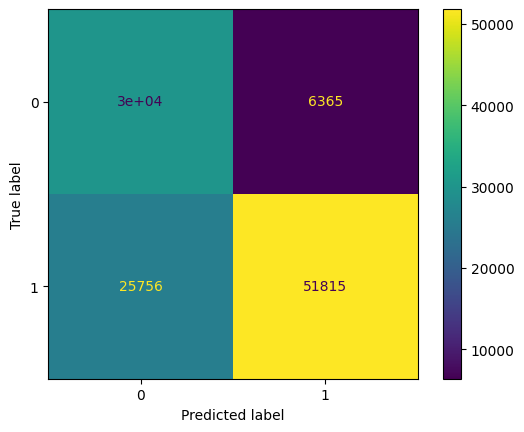

epsilon = 0.2
FPR: [0.30177515 0.17313187]
TPR: [0.82686813 0.69822485]
FNR: [0.17313187 0.30177515]
TNR: [0.69822485 0.82686813]
Accuracy: 0.7393108773284433
Precision(micro,macro,weighted): 0.7393108773284433,0.7291392657727407,0.7893340939112813
F1(micro,macro,weighted: 0.7393108773284434,0.7271468938311595,0.7479582038613568
Recall(micro,macro,weighted: 0.7393108773284433,0.7625464919695689,0.7393108773284433
FPR: 0.23745350803043108
tpr: 0.7625464919695689
fnr: 0.23745350803043108
tnr: 0.7625464919695689


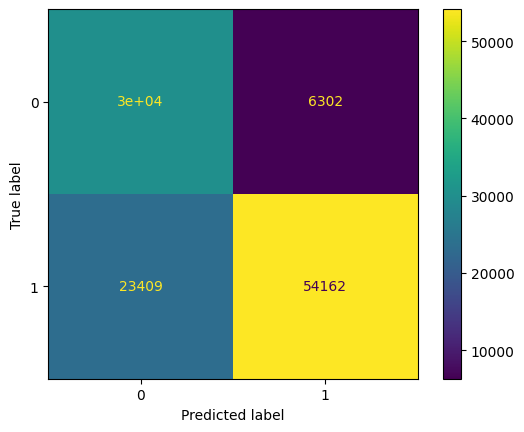

epsilon = 0.3
FPR: [0.2231504  0.55357143]
TPR: [0.44642857 0.7768496 ]
FNR: [0.55357143 0.2231504 ]
TNR: [0.7768496  0.44642857]
Accuracy: 0.6713198971668232
Precision(micro,macro,weighted): 0.6713198971668232,0.6168098917882086,0.6647113545412542
F1(micro,macro,weighted: 0.6713198971668232,0.6137177756657095,0.6676028713082159
Recall(micro,macro,weighted: 0.6713198971668232,0.6116390836413461,0.6713198971668232
FPR: 0.38836091635865394
tpr: 0.6116390836413461
fnr: 0.38836091635865394
tnr: 0.6116390836413461


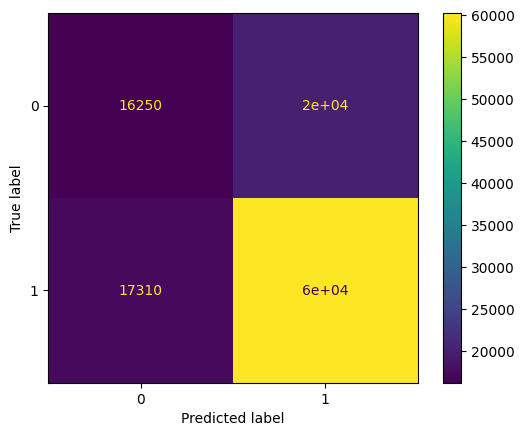

epsilon = 0.01
FPR: [0.10109448 0.1281044 ]
TPR: [0.8718956  0.89890552]
FNR: [0.1281044  0.10109448]
TNR: [0.89890552 0.8718956 ]
Accuracy: 0.8902791060883909
Precision(micro,macro,weighted): 0.8902791060883909,0.8695915770270461,0.8940573300211756
F1(micro,macro,weighted: 0.8902791060883909,0.8765626404955301,0.8914268383509647
Recall(micro,macro,weighted: 0.8902791060883909,0.8854005616053128,0.8902791060883909
FPR: 0.11459943839468725
tpr: 0.8854005616053128
fnr: 0.11459943839468725
tnr: 0.8854005616053128


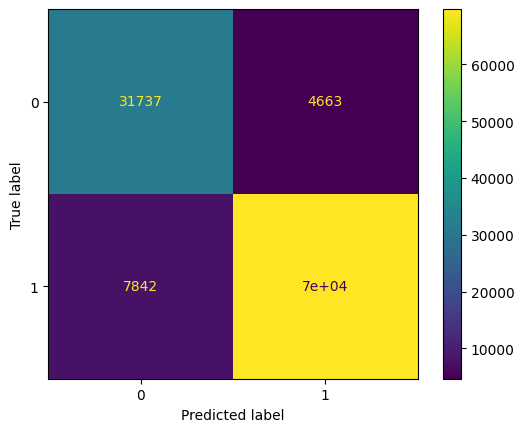

epsilon = 0.1
FPR: [0.3309742  0.17486264]
TPR: [0.82513736 0.6690258 ]
FNR: [0.17486264 0.3309742 ]
TNR: [0.6690258  0.82513736]
Accuracy: 0.7188846285458581
Precision(micro,macro,weighted): 0.7188846285458581,0.7149465062944638,0.7784547049674588
F1(micro,macro,weighted: 0.7188846285458582,0.7081457974031768,0.728369400777769
Recall(micro,macro,weighted: 0.7188846285458581,0.7470815791799954,0.7188846285458581
FPR: 0.2529184208200045
tpr: 0.7470815791799954
fnr: 0.2529184208200045
tnr: 0.7470815791799954


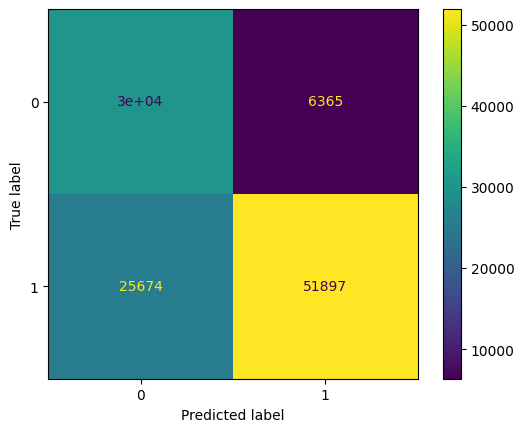

epsilon = 0.2
FPR: [0.30414717 0.17475275]
TPR: [0.82524725 0.69585283]
FNR: [0.17475275 0.30414717]
TNR: [0.69585283 0.82524725]
Accuracy: 0.7371787559993331
Precision(micro,macro,weighted): 0.7371787559993331,0.7273368408836631,0.787751554947663
F1(micro,macro,weighted: 0.7371787559993331,0.725048224782527,0.7459106710303705
Recall(micro,macro,weighted: 0.7371787559993331,0.7605500421733453,0.7371787559993331
FPR: 0.23944995782665465
tpr: 0.7605500421733453
fnr: 0.23944995782665465
tnr: 0.7605500421733453


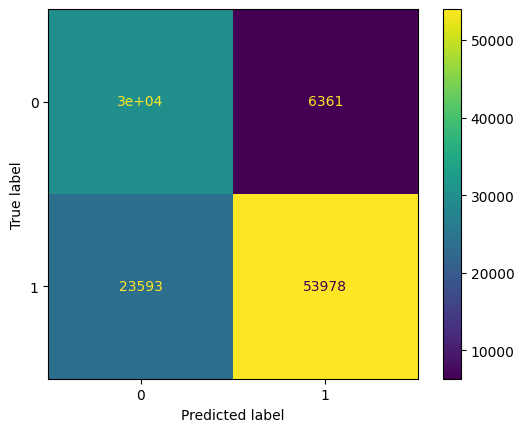

epsilon = 0.3
FPR: [0.22276366 0.58230769]
TPR: [0.41769231 0.77723634]
FNR: [0.58230769 0.22276366]
TNR: [0.77723634 0.41769231]
Accuracy: 0.6624053487290626
Precision(micro,macro,weighted): 0.6624053487290626,0.6039653483904497,0.6530650617537344
F1(micro,macro,weighted: 0.6624053487290626,0.5997692990123216,0.6569651382317849
Recall(micro,macro,weighted: 0.6624053487290626,0.5974643230073095,0.6624053487290626
FPR: 0.40253567699269055
tpr: 0.5974643230073095
fnr: 0.40253567699269055
tnr: 0.5974643230073095


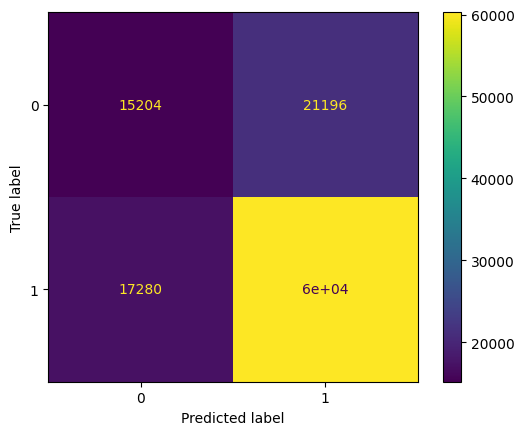

epsilon = 1e-07
FPR: [0.19719998 0.81299451]
TPR: [0.18700549 0.80280002]
FNR: [0.81299451 0.19719998]
TNR: [0.80280002 0.18700549]
Accuracy: 0.6061278746347755
Precision(micro,macro,weighted): 0.6061278746347755,0.4929122910206769,0.5597270609270177
F1(micro,macro,weighted: 0.6061278746347755,0.4838836855499424,0.5746207996684572
Recall(micro,macro,weighted: 0.6061278746347755,0.4949027549875966,0.6061278746347755
FPR: 0.5050972450124034
tpr: 0.4949027549875966
fnr: 0.5050972450124034
tnr: 0.4949027549875966


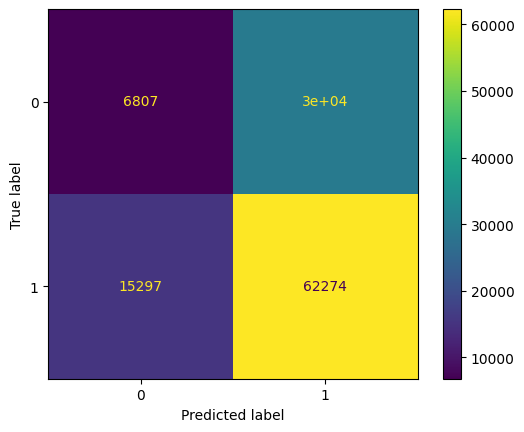

epsilon = 1e-06
FPR: [0.19719998 0.81299451]
TPR: [0.18700549 0.80280002]
FNR: [0.81299451 0.19719998]
TNR: [0.80280002 0.18700549]
Accuracy: 0.6061278746347755
Precision(micro,macro,weighted): 0.6061278746347755,0.4929122910206769,0.5597270609270177
F1(micro,macro,weighted: 0.6061278746347755,0.4838836855499424,0.5746207996684572
Recall(micro,macro,weighted: 0.6061278746347755,0.4949027549875966,0.6061278746347755
FPR: 0.5050972450124034
tpr: 0.4949027549875966
fnr: 0.5050972450124034
tnr: 0.4949027549875966


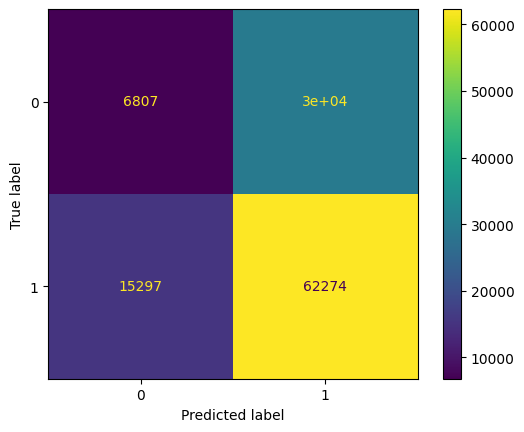

epsilon = 1e-05
FPR: [0.19719998 0.81299451]
TPR: [0.18700549 0.80280002]
FNR: [0.81299451 0.19719998]
TNR: [0.80280002 0.18700549]
Accuracy: 0.6061278746347755
Precision(micro,macro,weighted): 0.6061278746347755,0.4929122910206769,0.5597270609270177
F1(micro,macro,weighted: 0.6061278746347755,0.4838836855499424,0.5746207996684572
Recall(micro,macro,weighted: 0.6061278746347755,0.4949027549875966,0.6061278746347755
FPR: 0.5050972450124034
tpr: 0.4949027549875966
fnr: 0.5050972450124034
tnr: 0.4949027549875966


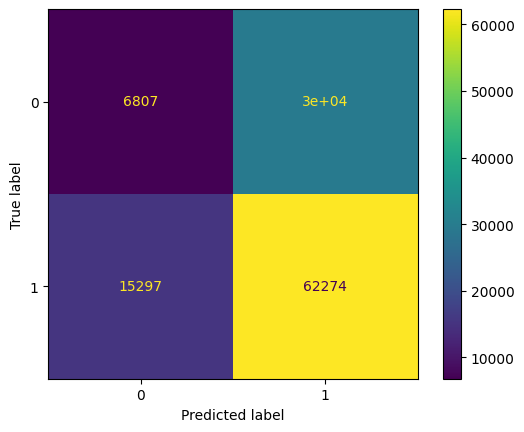

epsilon = 0.0001
FPR: [0.19719998 0.81299451]
TPR: [0.18700549 0.80280002]
FNR: [0.81299451 0.19719998]
TNR: [0.80280002 0.18700549]
Accuracy: 0.6061278746347755
Precision(micro,macro,weighted): 0.6061278746347755,0.4929122910206769,0.5597270609270177
F1(micro,macro,weighted: 0.6061278746347755,0.4838836855499424,0.5746207996684572
Recall(micro,macro,weighted: 0.6061278746347755,0.4949027549875966,0.6061278746347755
FPR: 0.5050972450124034
tpr: 0.4949027549875966
fnr: 0.5050972450124034
tnr: 0.4949027549875966


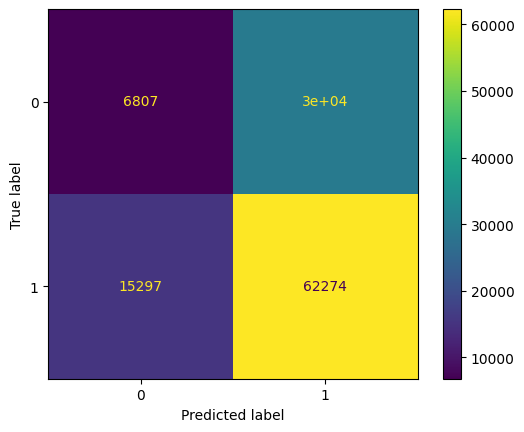

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/UNSW/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/UNSW/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/UNSW/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/UNSW/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "DF", epsilon)